#####

![Alt Text](https://www.owen.org/wp-content/uploads/inequaltyscreencap.png)

<h1 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> About this Kernel </h1>

This dataset has been taken from the famous UCI Machine Learning Repository. The goal of this notebook is to accurately predict whether or not an adult makes more than 50000 US Dollars in an year on the basis of the feautures given.


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Introduction </h3>

Int his notebook, I will be using only one Machine Learning Algorithm to implement the predictions. This notebook is going  to be different from my previous works because I'll try to implement Logistic Regression from scratch rather than using scikit-learn.

> So, without any further delay, lets get into it!


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Loading the data </h3>


In [8]:
import warnings
warnings.filterwarnings('ignore')

# ************** DATA MANIPULATION *****************

import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook')



In [9]:
from google.colab import drive
drive.mount('/content/drive/')

df = pd.read_csv('/content/drive/MyDrive/Programs/Lab/adult.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [10]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> About the Dataset </h3>

* **Age**: Describes the age of individuals. Continuous.
* **Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt**: Continuous.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num**: Number of years spent in education. Continuous.
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: Female, Male.
* **capital-gain**: Continuous.
* **capital-loss**: Continuous.
* **hours-per-week**: Continuous.
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* **salary**: >50K,<=50K

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

* The dataset contains absolutely **no null values**!
* Age, Final Weight, Education Number, Capital Gain, Capital Loss and Hours Per Week are integer columns.
* There are no Float Datatypes in the dataset.
* Workclass, Education, Marital Status, Occupation, Relationship, Race, Sec, Native Country and Income are of object datatypes.
* Although the dataset does not contain any null values, a closer look (see cell 3) tells us that there are a lot of **'?'** values in our dataset. We will have to **replace** those values!

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

* The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.
* The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
* While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
* The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [13]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

* We can see that the columns **workclass**, **occupation**, and **native.country** contains null values. We would have to find out a way to deal with them!
* There can be many ways to impute missing values, but right now, for the sake of simplicity we would impute them using **mode**!

In [14]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

<h1 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Exploratory Data Analysis </h1>

![Alt Text](https://www.statistika.co/images/services/Exploratory%20Data%20Analysis%20-%20EDA%201000x468.jpg)

**Before beginning, let us understand a bit about our data.**
> Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

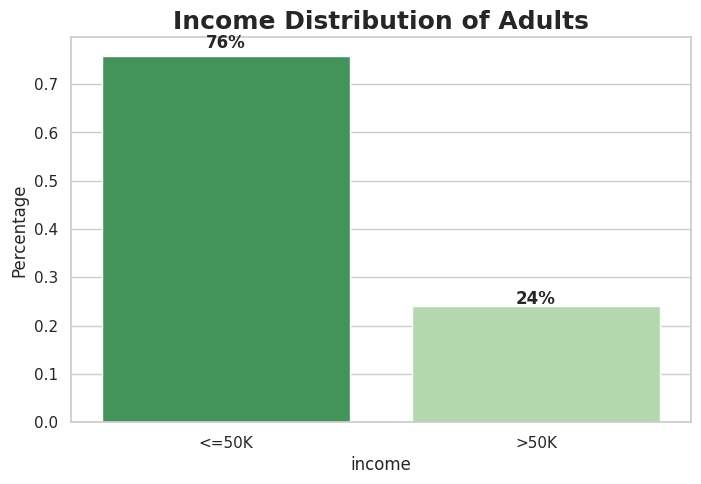

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

In the EDA Section, I wanted to start by analysing our target variable first. We have come across a very obvious observation!

* The number of people earning more than **50K dollars** an year is one third of the people earning less than it.
* We should also keep in mind that this data was collected in **1996**, so 50K dollars of that tme, might not be the same in today's time!

In [16]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

In [17]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['age_group'], hue = df['income'], palette='Greens_r', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

ValueError: ignored

<Figure size 1200x600 with 0 Axes>

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

We make an interesting observation over here. We see that people earning more than 50K dollars increase as the age increases upto a certain extent.
* As one might imagine, the number of people earning more than **50K** is quite negligible amongst people of **age group 19-30**.
* For the people of age group **41-50** and **51-60**, the number of people earning **more than 50K** is quite comparable to those earning less than it!

In [18]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['workclass'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

ValueError: ignored

<Figure size 1200x600 with 0 Axes>

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

In the above graph, we have segregated the incomes of adults on the basis of their different working classes.

* It is quite interesting to see that **Self-Employed** is the only category where the number of people who earn more than 50K dollars exceed those earning less than it! It might be conducive to suggest that when you handle your own business, start-up, etc. you are more likely to earn better if it gets successful!
* People working in the **Private Sector** face a significant difference between their pays where more than **75%** of them earn less than 50K dollars an year!
* There is a very minute difference between the number of people whose income is more or less than 50K dollars an year who work for the **Federal Govt.**
* People belonging to the category **Without-Pay** and **Never-Worked** hardly contain any data in both the categories.

In [19]:
plt.figure(figsize=(15,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school',
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(df['education'], hue = df['income'], palette='Greens_r', order= order_list)
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

ValueError: ignored

<Figure size 1500x600 with 0 Axes>

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

We can draw a few insightful conclusions from this graph.

* For the people who have completed their **education up till 12th Standard**, there are just a handful of them who earn more than 50K dollars an year. Most of the people end up earning below 50K!
* For the people belonging to **Bachelors**, **Masters**, **Doctorate**, **Prof-school** category in the education level, there are more number of people who are earning greater than **50K** dollars an year than the number of people earning less than it.
* In case of **Assoc-acad** or **Assoc-voc**, there are a few people who earn more than **50K** dollars an year!

In [20]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['marital.status'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

ValueError: ignored

<Figure size 1200x600 with 0 Axes>

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

* One thing to note here is that **Married-civ-spouse** is the only category which has comparable number of people belonging to both categories.
* For others, there are less than **25%** of the adults earning more than **50K** dollars an year.

In [21]:
plt.figure(figsize=(18,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['occupation'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

ValueError: ignored

<Figure size 1800x600 with 0 Axes>

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

A few points to note over here:-

* Adults in **Exec-managerial** role are equally likely to earn more than **50K** dollars an year.
* There's close to **33%** probablity for an adult in **Prof-specialty** to earn more than **50K** dollars an year.
* Adults working in **Farming-fishing**, **Machine-op-inspect**, **Other-service**, **Adm-clerical**, **Transport-moving** are very less likely to earn more than **50K** dollars an year.
* Around **25%** of the people working in **Sales** earn more than **50K** dollars an year.

In [22]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['relationship'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

ValueError: ignored

<Figure size 1200x600 with 0 Axes>

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

* **Wives** are equally likely to earn more than **50K** dollars an year.
* For **Husbands**, although significant, there is less possibility of them to earn more than **50K** dollars an year.
* There are just a handful of **Unmarried** people earning more than **50K** dollars an year.


In [ ]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['race'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

An important point to notice over here is that, except **Whites** there are very few people of different races. Due to this one may fail to notice the exact percentage and relationship of people earning more than 50K dollars an year.

In [ ]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['sex'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

We can see a significant gap in the earnings between males and females over here.

* For **Females**, there are less than **10%** of the adults earning more than **50K** dollars an year.
* In case of **Males** there are close to **33%** of them earning more than **50K** dollars an year.

In [ ]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})


In [ ]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df.corr(), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

Here, we have tried to plot a correlation map in order to see whether or not the independent features are related to the dependent features.

* We see that most of the features are positively correlated with the **Income Variable**.
* An important thing to note over here is that, we have not covered the object datatypes in this correlation graph.

In [ ]:
#Distributing Age column in 3 significant parts and plotting it corresponding to the output feature(income)

#Combining the lower grades of education together

df.drop(['education.num'], axis = 1, inplace = True)
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)

df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)



In [ ]:
df.drop('age_group', inplace = True, axis = 1)

<h1 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Model Implementation </h1>

* So, coming to the part I'm finally excited about!
* This notebook is special to me as it is the first time I'm trying to implement any model from scratch.

* Here, I'll be using **Logistic Regression Model** and try to build it from scratch.
* I will then do the same by using Scikit-learn package and see if there's a major difference in the accuracy!

In [23]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> About Logistic Regression: </h3>


Before we start coding let us first understand or atleast try to understand the things happening at the back-end of **Scikit Learn's Logistic Regression**. The aim of this section is to explain the math behind Logistic Regression and to accomplish the first objective of this kernel.

To be able to do this we must answer the question, how does a Logistic Regression work? In theory, a Logistic regression takes input and returns an output of probability, a value between 0 and 1. How does a Logistic Regression do that? With the help of a function called a logistic function or most commonly known as a **sigmoid**. This sigmoid function is reponsible for predicting or classifying a given input.

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> About the Sigmoid function: </h3>

* It is a mathematical function having a characteristic that can take any real value and map it to between 0 to 1 shaped like the letter “S”.
* The sigmoid function also called a **logistic function**.
* The sigmoid function g(z) takes features and weights z as an input and returns a result between 0 and 1.
* The output of the sigmoid function is an actual prediction ŷ.
* So, if the value of z goes to **positive infinity** then the predicted value of y will become 1 and if it goes to **negative infinity** then the predicted value of y will become 0.
* And if the outcome of the sigmoid function is more than 0.5 then we classify that label as **class 1** or positive class and if it is less than 0.5 then we can classify it to negative class or label as **class 0**.

![Alt Text](https://miro.medium.com/max/932/1*bCCcQhMjHGaI89i-7i3xFw.png)


In [25]:
def sigmoid(x, weight):
    z = np.dot(x, weight)
    return 1 / (1 + np.exp(-z))

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> About the Loss Function: </h3>

Weights is a vital part of **Logistic Regression** and other Machine Learning algorithms and we want to find the best values for them. To start we pick random values and we need a way to measure how well the algorithm performs using those random weights. That measure is computed using the loss function.

The **loss function** is defined as:

![Alt Text](https://miro.medium.com/max/1838/1*dEZxrHeNGlhfNt-JyRLpig.png)




In [26]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> About the Gradient Descent: </h3>

**Gradient descent** is an iterative optimization algorithm, which finds the minimum of a differentiable function. In this process, we try different values and update them to reach the optimal ones, minimizing the cost.

* Lets think first step, every thing starts with initializing weights and bias. Therefore cost is dependent with them.
* In order to decrease cost, we need to update **weights** and **bias**.
* In other words, our model needs to learn the **parameters weights** and **bias** that minimize cost function. This technique is called gradient descent.

![Alt Text](https://i.stack.imgur.com/zgdnk.png)


1. The idea is you first select any random point from the function.
2. Then you need to compute the derivative of J().
3. This will point to the direction of the **local minimum**.
4. Now multiply that resultant gradient with the **Learning Rate**.
5. The Learning Rate has no fixed value, and is to be decided based on problems.
6. Now, you need to subtract the result from to get the new .
7. This update of should be simultaneously done for every (i).

**Do these steps repeatedly until you reach the local or global minimum. By reaching the global minimum, you have achieved the lowest possible loss in your prediction.**


![Alt Text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS8pJOKA1xjb4sG01ekpv-nwdMHa-OSTTyqHRYDSBEO4W6PE2f3dkHJoDltb4lN2d-dAOs&usqp=CAU)

In [27]:
def gradient_descent(x, h, y):
    return np.dot(x.T, (h - y)) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Maximum Likelihood Estimation: </h3>


* It its simplest, **MLE** is a method for estimating parameters.
* Every time we fit a statistical or machine learning model, we are estimating parameters. A single variable linear regression has the equation:

<h4> Y = B0 + B1*X </h4>

Our goal when we fit this model is to estimate the parameters **B0** and **B1** given our observed values of **Y** and **X**. **Maximum Likelihood Estimation** is a way to estimate the parameters of a model, given what we observe.

MLE asks the question, **“Given the data that we observe (our sample), what are the model parameters that maximize the likelihood of the observed data occurring?”**


In [28]:
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Gradient Ascent: </h3>

* So after seeing the **Cost Function** and **Sigmoid Function**, now let’s think of an algorithm which can combine these two function and gives us the desired result.
* The algorithm is the Gradient Ascent algorithm.
* So **Gradient Ascent** is an iterative optimization algorithm for finding local maxima of a differentiable function.
* The algorithm moves in the direction of gradient calculated at each and every point of the cost function curve till the stopping criteria meets.

![Alt Text](https://slidetodoc.com/presentation_image_h/23f0886a9c3cfd7f583d5c571e50f5dc/image-30.jpg)


> The idea behind **Gradient Ascent** is that gradient points **‘uphill’**.

So if you slowly slowly moves towards the direction of gradient then you eventually make it to the **global maxima**.

Gradient ascent has an analogy in which we have to imagine ourselves at the bottom of a mountain valley and left stranded and blindfolded, our objective is to reach the top of the hill. Now to maximize our log likelihood we need to run the gradient ascent function on each parameter i.e.

**weights = weights + learning_rate * gradient**



In [35]:
def gradient_ascent(x, h, y):
    return np.dot(x.T, y - h)
def update_weight_mle(weight, learning_rate, gradient):
    return weight + learning_rate * gradient

In [36]:
import time
start_time = time.time()

num_iter = 100000

intercept = np.ones((x.shape[0], 1))
x = np.concatenate((intercept, x), axis=1)
theta = np.zeros(x.shape[1])

for i in range(num_iter):
    h = sigmoid(x, theta)
    gradient = gradient_descent(x, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)

print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

TypeError: ignored

In [37]:
result = sigmoid(x, theta)

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Final Implementation: </h3>


In [32]:
f = pd.DataFrame(np.around(result, decimals=6)).join(y)
f['pred'] = f[0].apply(lambda x : 0 if x < 0.5 else 1)
print("Accuracy (Loss minimization):")
f.loc[f['pred']==f['income']].shape[0] / f.shape[0] * 100

Accuracy (Loss minimization):


0.0

In [33]:
start_time = time.time()
num_iter = 100000
x2 = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]

intercept2 = np.ones((x2.shape[0], 1))

x2 = np.concatenate((intercept2, x2), axis=1)
theta2 = np.zeros(x2.shape[1])

for i in range(num_iter):
    h2 = sigmoid(x2, theta2)
    gradient2 = gradient_ascent(x2, h2, y) #np.dot(X.T, (h - y)) / y.size
    theta2 = update_weight_mle(theta2, 0.1, gradient2)

print("Training time (Log Reg using MLE):" + str(time.time() - start_time) + "seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))


TypeError: ignored

In [34]:
result2 = sigmoid(x2, theta2)
print("Accuracy (Maximum Likelihood Estimation):")
f2 = pd.DataFrame(result2).join(y)
f2.loc[f2[0]==f2['income']].shape[0] / f2.shape[0] * 100

Accuracy (Maximum Likelihood Estimation):


0.0

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Logistic Regression using MLE: </h3>

Here, we see that on implementing **Logistic Regression** from Scratch using **Maximum Likelihood Estimation**, we are able to achieve an accuracy of **78.9** %.
Let us try importing Scikit Learn and compare our model with the inbuilt Logistic Regression of the package.


In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [ ]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test, Y_pred)
print("Logistic Regression",acc)



In [ ]:
X = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

lr = LogisticRegression(solver='lbfgs', max_iter=10000)
rs = []
acc = []
for i in range(1,25,1):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
    model_lr_rs = lr.fit(X_train, y_train)
    predict_values_lr_rs = model_lr_rs.predict(X_test)
    acc.append(accuracy_score(y_test, predict_values_lr_rs))
    rs.append(i)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(rs, acc, color ='red')

for i in range(len(rs)):
    print(rs[i],acc[i])

In [ ]:
for i in range(0,24):
    if acc[i] > 0.808:
        print(acc[i])


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Logistic Regression Conclusion: </h3>

We see that the **Logistic Regression using Sklearn** gives us a maximum accuracy of **80.9** %.
Thinking about this, the model that we prepared from scratch was not so bad as compared to the inbuilt one!





<h1 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Summary and Conclusion: </h1>


In this kernel, we've created a **logistic regression from scratch**. We've learned the computations happening at the back-end of a Logistic Regression. We've transormed these equations and mathematical functions into python codes. We've trained our logistic regression function in two ways: through loss minimizing using gradient descent and maximizing the likelihood using gradient ascent. The Adult Income Dataset was used for training and also evaluation.

I'm still trying to find out how I could improve the accuracy of the **Loss Minimizing Logistic Regression**. If you can help me with that, I'll be glad to improve this notebook!

Despite all of these, our function performed quite well I would say, (LOL) it's not that far out from the accuracy of sklearn, however there are other metrics to consider in comparing these models as well.

To wrap things up let us review our objectives and wether we've accomplished them. The first objective was to understand the dataset itself and our EDA helped us gain better insights of the same. Secondly, we wanted to understand the theory behind Logistic Regression. The third objective was to implement the Logistic Regression without using built-in Logistic Regression libraries, yes we've done that as well, and it was trained, and evaluated.


> This logistic regression implementation would probably be never used in production and it is unlikely that it will defeat sklearn's own LogisticRegression module, however the goal of this kernel was to understand intrecately the structure of different algorithms, in this case, Logistic Regression.

Thank you so much for checking out this notebook!